In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv("heart_failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


1. Sex - Gender of patient Male = 1, Female =0
2. Age - Age of patient
3. Diabetes - 0 = No, 1 = Yes
4. Anaemia - 0 = No, 1 = Yes
5. High_blood_pressure - 0 = No, 1 = Yes
6. Smoking - 0 = No, 1 = Yes
7. DEATH_EVENT - 0 = No, 1 = Yes

# Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Describe

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# Age

In [5]:
hist_data_age = [df["age"].values]
#hist_data_sex = df["sex"]
#hist_data = [hist_data_age, hist_data_sex]

group_labels_age = ["age"]
#group_labels_sex = "sex"
#group_labels = [group_labels_age, group_labels_sex]


fig = ff.create_distplot(hist_data = hist_data_age, group_labels = group_labels_age)
fig.update_layout(title_text='Age Distribution plot')
fig.show()

from above we see that distribution after 70 years is less dense. Around 60 year is the most common age in data set.

## Age and gender. Which age is common in what gender??

In [6]:
hist_data_male = df[df["sex"] == 1]["age"]
hist_data_female = df[df["sex"] == 0]["age"]
hist_data = [hist_data_male, hist_data_female]

group_labels_sex = ["male", "female"]


fig = ff.create_distplot(hist_data = hist_data, group_labels = group_labels_sex)
fig.update_layout(title_text='age Distribution plot according to gender')
fig.show()

Following observations can be mage for data about female:<br>
1. Data distribution is very less for female having age more than 70.
2. The data is more for age groups in range (57-70) and (48-55) years

Following observations can be mage for data about male:<br>
1. Data distribution is less for male having age more than 80.
2. Distribution is dense aroung 60 years of age.

In [7]:
import plotly.io as pio

sex = df["sex"]
age = df["age"]

data = [dict(
        type = "box",
        x = sex,
        y = age,
        transforms = [dict(
                type = "groupby",
                groups = sex,
            )]
    )]
fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)

## Age and Death. Which age has most death??

In [8]:
fig = px.histogram(df, x="age", color="DEATH_EVENT")
fig.update_layout(
title = "distribution of age for death and no death event")
fig.show()

1. Around 58-62 maximum deaths occour.
2. After 73 years of age no death data has steep decline.
3. After 73 years of age there is consistent death event.

# Diseases

## Corelation between different diseases

In [9]:
df_dis = df[['anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', "smoking"]]
df_dis

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking
0,0,582,0,20,1,265000.00,1.9,130,0
1,0,7861,0,38,0,263358.03,1.1,136,0
2,0,146,0,20,0,162000.00,1.3,129,1
3,1,111,0,20,0,210000.00,1.9,137,0
4,1,160,1,20,0,327000.00,2.7,116,0
...,...,...,...,...,...,...,...,...,...
294,0,61,1,38,1,155000.00,1.1,143,1
295,0,1820,0,38,0,270000.00,1.2,139,0
296,0,2060,1,60,0,742000.00,0.8,138,0
297,0,2413,0,38,0,140000.00,1.4,140,1


In [10]:

fig = px.imshow(list(df_dis.values),
                labels=dict(x="Impact", y="Probability", color="Number of Risks"),
                x = list(df_dis.columns),
                #y=list(df_dis.columns)
               )
fig.update_xaxes(side="bottom")

fig.show()

In [11]:
gross_data=[[0,1,2,6,3], [0,7,18,12,6], [6,10,43,44,7], [3,15,29,46,18], [5,14,26,22,21]]

fig = px.imshow(gross_data,
                labels=dict(x="Impact", y="Probability", color="Number of Risks"),
                x=['Minor [Very Low]', 'Important [Low]', 'Significant [Moderate]', 'Major [High]', 'Critical [Very High]'],
                y=['Very Remote', 'Remote', 'Unlikely', 'Possible', 'Highly Possible']
               )
fig.update_xaxes(side="bottom")

fig.show()

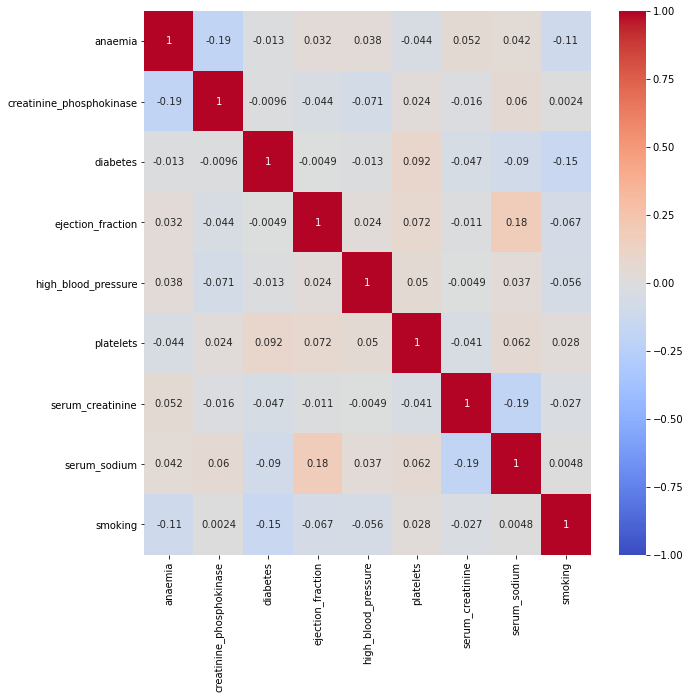

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df_dis.corr(), vmin=-1, cmap='coolwarm', annot=True);

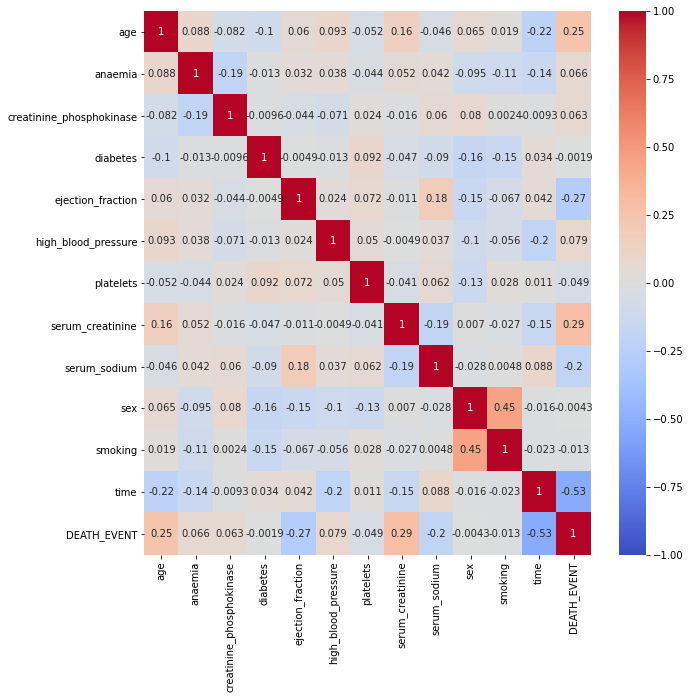

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

# Deaths

In [14]:
import plotly.graph_objects as go

#labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
#values = [4500, 2500, 1053, 500]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=df["DEATH_EVENT"], values=df["age"], pull=[0.1, 0, 0.1, 0])])
fig.show()

In our dataset we have negative death event as 65.6% whereas positive death event is 34.4%.

## Which gender has more deaths??

In [15]:
fig = px.histogram(df, x = "DEATH_EVENT", color = "sex", barmode = "group", facet_col = "smoking",
             color_discrete_map= {1: '#3C8DD6', 0: '#EC2781'})



fig.update_layout(
            title = "<b>Distribution of death and non-death event according to sex and smoking habits</b>",
            yaxis_title = "Count",
            plot_bgcolor = "#ECECEC")

fig.show()

In [16]:
df.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1


In [17]:
a = df.loc[:, df.columns != 'DEATH_EVENT']
a

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [18]:
#Features = ['time','ejection_fraction','serum_creatinine']
x = df.loc[:, df.columns != 'DEATH_EVENT']
y = df["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [19]:
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
#accuracy_list.append(100*gradientboost_acc)

In [20]:
gradientboost_acc

0.95

In [22]:
import pandas as pd
import plotly.express as px  # (version 4.7.0)
import plotly.graph_objects as go

import dash  # (version 1.12.0) pip install dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)


# ---------- Import and clean data (importing csv into pandas)
# df = pd.read_csv("intro_bees.csv")
df = pd.read_csv("https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Other/Dash_Introduction/intro_bees.csv")

df = df.groupby(['State', 'ANSI', 'Affected by', 'Year', 'state_code'])[['Pct of Colonies Impacted']].mean()
df.reset_index(inplace=True)
print(df[:5])

# ------------------------------------------------------------------------------
# App layout
app.layout = html.Div([

    html.H1("Web Application Dashboards with Dash", style={'text-align': 'center'}),

    dcc.Dropdown(id="slct_year",
                 options=[
                     {"label": "2015", "value": 2015},
                     {"label": "2016", "value": 2016},
                     {"label": "2017", "value": 2017},
                     {"label": "2018", "value": 2018}],
                 multi=False,
                 value=2015,
                 style={'width': "40%"}
                 ),

    html.Div(id='output_container', children=[]),
    html.Br(),

    dcc.Graph(id='my_bee_map', figure={})

])


# ------------------------------------------------------------------------------
# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='my_bee_map', component_property='figure')],
    [Input(component_id='slct_year', component_property='value')]
)
def update_graph(option_slctd):
    print(option_slctd)
    print(type(option_slctd))

    container = "The year chosen by user was: {}".format(option_slctd)

    dff = df.copy()
    dff = dff[dff["Year"] == option_slctd]
    dff = dff[dff["Affected by"] == "Varroa_mites"]

    # Plotly Express
    fig = px.choropleth(
        data_frame=dff,
        locationmode='USA-states',
        locations='state_code',
        scope="usa",
        color='Pct of Colonies Impacted',
        hover_data=['State', 'Pct of Colonies Impacted'],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        labels={'Pct of Colonies Impacted': '% of Bee Colonies'},
        template='plotly_dark'
    )

    # Plotly Graph Objects (GO)
    # fig = go.Figure(
    #     data=[go.Choropleth(
    #         locationmode='USA-states',
    #         locations=dff['state_code'],
    #         z=dff["Pct of Colonies Impacted"].astype(float),
    #         colorscale='Reds',
    #     )]
    # )
    #
    # fig.update_layout(
    #     title_text="Bees Affected by Mites in the USA",
    #     title_xanchor="center",
    #     title_font=dict(size=24),
    #     title_x=0.5,
    #     geo=dict(scope='usa'),
    # )

    return container, fig

     State  ANSI Affected by  Year state_code  Pct of Colonies Impacted
0  Alabama     1     Disease  2015         AL                      0.05
1  Alabama     1     Disease  2016         AL                      1.20
2  Alabama     1     Disease  2017         AL                      2.25
3  Alabama     1     Disease  2018         AL                      1.30
4  Alabama     1     Disease  2019         AL                      1.80


In [25]:
import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc

In [26]:
# App Instance
app = dash.Dash(name="name")
app.title = "name"

In [27]:
# Input
# Output
navbar = dbc.Nav()
# Callbacks
@app.callback()
def function():
    return 0

In [28]:
# Input
inputs = dbc.FormGroup()
# Output
body = dbc.Row([
        ## input
        dbc.Col(md=3),
        ## output
        dbc.Col(md=9)
])
# Callbacks
@app.callback()
def function():
    return 0

In [29]:
app.layout = dbc.Container(fluid=True, children=[
    html.H1("name", id="nav-pills"),
    navbar,
    html.Br(),html.Br(),html.Br(),
    body
])


In [30]:
if __name__ == "__main__":
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "name" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1